# VPC to Protein Sequence

In [1]:
import gzip
import pandas as pd
import numpy as np
import regex as re

In [2]:
annotated_file = "mgv_pc_functions.tsv.gz"
protein_file = "mgv_proteins.faa.gz"
vpc_protein_file = "VPC/VPC_protein.txt.gz"

with gzip.open(vpc_protein_file, "r") as f:
    lines = [line.strip().decode() for line in f.readlines()]
    vpc_proteins = {line[0] : [{i : "" } for i in line[1:]]  for line in [line.split(",") for line in lines]}
    # write key, value to file
    # with open("VPC_protein_list.csv", "w") as f:
    #     for k, v in vpc_proteins.items():
    #         for val in v:
    #             print(f"{k},{val}\n")
    #             f.write(f"{k},{val}\n")
# vpc_proteins

FileNotFoundError: [Errno 2] No such file or directory: 'VPC/VPC_protein.txt.gz'

In [ ]:
# read VPC_protein_list.csv into dataframe
df = pd.read_csv("./VPC/VPC_connector.csv", header=None)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
# df["protein_seq"] = np.nan
# df["pfam_annotation"] = np.nan
# df = df.reindex(columns=["pfam_annotation", "vpc_id", "protein_id", "protein_seq"])
df
len(df)

146

In [ ]:
with open("./VPC/VPC_protein_full.csv", "r") as f:
    lines = f.readlines()
    # for line in lines:
    #     print(line)
    print(lines[71])

 Phage gp6-like head-tail connector protein,VPC-89868,MGV-GENOME-0173199_8,MTINALDVVSIEELRQHIEFDSDDRDALIARYAQGALDYCLTYCDEPRWKQPDDLPSQVVSAMLLFFCDAFEHRGAQTETQLYANQRAHDLLFQVRNWRGETDVVEGV*,



In [ ]:
df1 = pd.read_csv("./VPC/VPC_protein_full.csv", header=None)
df1 = df1.iloc[:,:4]
df1.columns = ["annotation", "vpc_id", "protein_id", "protein_seq"]
# clean_df = df1.loc[df1["annotation"].str.contains("connector|portal")]
# clean_df

portal_df = df1.loc[df1["annotation"].str.contains("portal")]
portal_df
# len(df1.loc[df1["annotation"].str.contains("connector")])
connector_df = df1.loc[df1["annotation"].str.contains("connector")]
connector_df

annotation      vpc_id  \
0     Phage gp6-like head-tail connector protein    VPC-8627   
1     Phage gp6-like head-tail connector protein   VPC-16699   
2     Phage gp6-like head-tail connector protein  VPC-135993   
3     Phage gp6-like head-tail connector protein     VPC-545   
4     Phage gp6-like head-tail connector protein  VPC-456140   
..                                           ...         ...   
163   Phage gp6-like head-tail connector protein   VPC-74481   
166   Phage gp6-like head-tail connector protein   VPC-12564   
167   Phage gp6-like head-tail connector protein  VPC-251610   
168   Phage gp6-like head-tail connector protein  VPC-175440   
170   Phage gp6-like head-tail connector protein  VPC-239080   

                protein_id                                        protein_seq  
0    MGV-GENOME-0282701_34  MSLDDEKILEKIKFSCRIDDDIFNDELEELKLAAELYLKNAGINKN...  
1    MGV-GENOME-0270537_10  MLSMADFEDTVLINVKEDLAISDDLQDKVLKRLISKVCDHFKLAYS...  
2    MGV-GENOME-0232097_34  MSIKNLMGTVTDDDLQLTKTSLRLEPDDTEDDILLRMLIKTARRDI...  
3    MGV-GENOME-0260596_65  MEYTTLEQVKIRLKQFHIDTVTNDDETTSDVVVFDNKEDNPVIEQL...  
4    MGV-GENOME-0209946_11  MSGEAAAFKPPNRTERTKERSAPRNGAHQGTDGAALWASLEATLIE...  
..                     ...                                                ...  
163  MGV-GENOME-0295101_18  MVTVARIETGDSKITIDEVKSYIHLIGNERDDELQVMLDAAIAAVE...  
166  MGV-GENOME-0233142_24  MVITRQPPAVEPLSLEEVKLHLRNNPGDTSEDKDIIAPLISAAREY...  
167  MGV-GENOME-0268729_21  MFELIKKLSNTQADDEVINFYIANAKQAIKSYLNDNKIDVAALYRN...  
168  MGV-GENOME-0212420_31  MLISPELLEAYNHITQEQNVSSQAIIKIHIGAAQQIINDYVGFNCE...  
170  MGV-GENOME-0359244_25  MTDSLELNYVKNYLRVDYDEEQEDKFIQMCITASRSFVETYMNRSL...  

[146 rows x 4 columns]

In [ ]:
# write connector_df to file
connector_df.to_csv("./VPC/VPC_connector.csv", index=False)

In [ ]:
# convert connector_df to fasta file
with open("./VPC/VPC_portal.fasta", "w") as w:
    for i in range(portal_df.shape[0]):
        w.write(f">{portal_df.iloc[i, 2]}\n{portal_df.iloc[i, 3]}\n")

In [ ]:
# write connector_df to file
with open("./VPC/VPC_portal.fasta", "w") as w:
    for i in range(df1.shape[0]):
        w.write(f">{df1.iloc[i, 2]}\n{df1.iloc[i, 3]}\n")

In [ ]:
# get annotation col from df_connector

# get words that are contained in all elements of connector_df[['annotation']]
words = connector_df['annotation'].str.split().tolist()
words = set.intersection(*map(set, words))
# convert set to list
words = list(words)
" ".join(words)

'Phage head-tail gp6-like protein connector'

In [ ]:
# use pfam annotation to get protein id and seq
# 1. bash ../match_VPC_protein.sh [annotation_file] [vpc_protein_file] [protein_file] [output_file] [string_description]
#       - outputs csv with:  annotation, vpc_id, protein, protein_seq 
# 2. find_seq(output_file)
#       - outputs fasta with protein_id and protein_seq

def find_seq(annotation_seq_file):
    df = pd.read_csv(annotation_seq_file)
    # get words that are contained in all elements of connector_df[['annotation']]
    words = connector_df['annotation'].str.split().tolist()
    words = set.intersection(*map(set, words))
    words = " ".join(list(words))
    output_file = f"{words}.fasta"
    with open(output_file, "w") as w:
        for i in range(df.shape[0]):
            w.write(f">{df.iloc[i, 2]}\n{df.iloc[i, 3]}\n")
    

In [ ]:
# label pfam annotations
annotated_file = "mgv_pc_functions.tsv.gz"
with gzip.open(annotated_file, "r") as f:
    lines = [line.strip().decode() for line in f.readlines()]
    # for i in df.loc["pfam_annotation"]:
    for line in lines[1:]:
        if line.split("\t")[0] in df["vpc_id"].values:
            print(line.split("\t")[0])
            print(df[df["vpc_id"]==line.split("\t")[0]].index.values)
            # print(line.split("\t")[0])
            # find row with line.split("\t")[0] and add pfam annotation
            # df[line.split("\t")[0]]["pfam_annotation"] = line.split("\t")[2]
            # if i in line:
            #     df["vpc_id"] = line.split("\t")[3]
            #     break

VPC-42662
[36896 36897 36898 36899 36900 36901 36902 36903 36904 36905 36906 36907
 36908 36909 36910 36911 36912 36913 36914 36915 36916 36917 36918 36919
 36920 36921 36922 36923 36924 36925 36926 36927 36928]
VPC-69652
[36929 36930 36931 36932 36933 36934 36935 36936 36937 36938 36939 36940
 36941 36942 36943 36944]
VPC-79315
[36945 36946 36947 36948 36949 36950 36951 36952 36953 36954 36955 36956
 36957]
VPC-271512
[36958 36959]
VPC-135993
[0 1 2 3 4]
VPC-16699
[  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120]
VPC-400410
[121]
VPC-122069
[122 123 124 125 126 127]
VPC-

KeyboardInterrupt: 

In [ ]:
# read through protein file and get protein sequence
test_file = "test_caudovirales/test_caudovirales_10_31_2.faa.gz"
with gzip.open(test_file, "r") as f:
    lines = [line.strip().decode() for line in f.readlines()]
    headers = []
    seqs = []
    seq = ""
    for line in lines:
        if line.startswith('>') and line != "" : 
            headers.append(line.split(" ")[0].strip())
            seqs.append(seq)
            seq = ""
        else:            
            seq += line.strip()
    seqs.append(seq)
    seqs = seqs[1:]


In [ ]:
# add vpc_proteins to pandas dataframe
df = pd.DataFrame(np.zeros((1,4)))
df.columns = ["protein_annotation", "vpc_id", "protein_id", "protein_sequence"]
for key, value in vpc_proteins.items():
    # find protein annotation
    # with open(annotated_file, "r") as f:
    #     annotation = re.findall(key)
    for val in value:
        df = df.append({"protein_annotation" : 0, "vpc_id" : key, "protein_id" : val, "protein_sequence" : 0}, ignore_index=True)
df


C:\Users\bunan\AppData\Local\Temp\ipykernel_27536\483952808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"protein_annotation" : 0, "vpc_id" : "VPC-135993", "protein_id" : value[0], "protein_sequence" : 0}, ignore_index=True)


protein_annotation      vpc_id              protein_id  protein_sequence
0                 0.0         0.0                     0.0               0.0
1                 0.0  VPC-135993   MGV-GENOME-0263969_19               0.0

In [ ]:
key = "VPC-135993"
with open(annotated_file, "r") as f:
    annotation = re.findall(key)

dict_items

In [ ]:
# Create a jagged array for the address column
df = pd.DataFrame(np.zeros(()))
df.columns = ["protein_id", "vpc_id"]
#df["protein_id"] = vpc_proteins.keys()
print(df)

   protein_id  vpc_id
0         0.0     0.0


In [ ]:
import os

with open("./VPC_34.csv", "r") as f:
    line = f.readlines()[0]
    protein_list = line.split(",")
    for p in protein_list:
        print(p)
        os.zgrep()

MGV-GENOME-0100472_17
MGV-GENOME-0106096_3
MGV-GENOME-0074413_3
MGV-GENOME-0069689_12
MGV-GENOME-0120916_13
MGV-GENOME-0130205_12
MGV-GENOME-0129415_13
MGV-GENOME-0127070_13
MGV-GENOME-0131432_13
MGV-GENOME-0129102_12
MGV-GENOME-0129533_11
MGV-GENOME-0121717_13
MGV-GENOME-0122369_11
MGV-GENOME-0130228_12
MGV-GENOME-0124200_13
MGV-GENOME-0117157_13
MGV-GENOME-0123269_13
MGV-GENOME-0129245_13
MGV-GENOME-0130106_13
MGV-GENOME-0124180_13
MGV-GENOME-0125429_13
MGV-GENOME-0077425_5
MGV-GENOME-4336275_11
MGV-GENOME-0132119_12
MGV-GENOME-0098120_13
MGV-GENOME-0128206_12
MGV-GENOME-0116042_10
MGV-GENOME-0106281_13
MGV-GENOME-0127761_11
MGV-GENOME-0072457_13
MGV-GENOME-0132558_13
MGV-GENOME-0129472_13
MGV-GENOME-0123670_12
MGV-GENOME-0090436_15
MGV-GENOME-0094690_5
MGV-GENOME-0090116_5
MGV-GENOME-0093675_17
MGV-GENOME-0089280_14
MGV-GENOME-0081721_14
MGV-GENOME-0087697_4
MGV-GENOME-0107922_17
MGV-GENOME-0134778_12
MGV-GENOME-0119149_13
MGV-GENOME-0072144_13
MGV-GENOME-0111379_12
MGV-GENOME-01368

# VPC 34

In [ ]:
df1 = pd.read_csv("temp/temp_pc_count.txt", sep=" ", names=["VPC", "count"])
df1 = df1.iloc[1:,:]
df1


VPC  count
1   VPC-113928      1
2    VPC-24910      1
3    VPC-25017      1
4    VPC-27023      1
5    VPC-28734      1
6   VPC-289727      1
7   VPC-297961      1
8      VPC-363      1
9   VPC-411231      1
10   VPC-45095      1
11     VPC-600      1
12   VPC-75901      1
13   VPC-16480      2
14    VPC-1997      2
15      VPC-49      2
16    VPC-1820      3
17      VPC-34    500

In [ ]:
df2 = pd.read_csv("connector_proteins/VPC/VPC_34/VPC_34_blast_vpc.txt", sep=" ", names=["count", "VPC"])
df2 = df2[["VPC", "count"]]
df2

VPC  count
0    VPC-101110      1
1    VPC-103580      1
2    VPC-109008      1
3    VPC-113751      1
4    VPC-115426      1
..          ...    ...
903     VPC-174    392
904     VPC-123    461
905      VPC-49    469
906      VPC-36    498
907      VPC-34    500

[908 rows x 2 columns]

In [ ]:
df2 = df2.merge(df1, on="VPC", how="left")
df2

VPC  count                                         Annotation
0    VPC-101110      1                                                NaN
1    VPC-103580      1                  Pectate lyase superfamily protein
2    VPC-109008      1                                                NaN
3    VPC-113751      1   Mannosyl-glycoprotein endo-beta-N-acetylgluco...
4    VPC-113751      1                       flgJ; flagellar protein FlgJ
..          ...    ...                                                ...
981     VPC-123    461                                                NaN
982      VPC-49    469        DNA polymerase type B, organellar and viral
983      VPC-49    469        gp2; Phi29virus DNA polymerase [EC:2.7.7.7]
984      VPC-36    498                 Bacterial Ig-like domain (group 2)
985      VPC-34    500                             Phage Connector (GP10)

[986 rows x 3 columns]

In [ ]:
df2 = df2.sort_values(by="count", ascending=False)
df2.to_csv("connector_proteins/VPC/VPC_34/VPC_34_blast.tsv", sep="\t", index=False, header=False)

In [ ]:
df3 = pd.read_csv("connector_proteins/VPC/VPC_34/VPC_34_blast.tsv", sep="\t", names=["VPC", "count", "Annotation"])
df3.head(10)

VPC  count                                    Annotation
0    VPC-34    500                        Phage Connector (GP10)
1    VPC-36    498            Bacterial Ig-like domain (group 2)
2    VPC-49    469   gp2; Phi29virus DNA polymerase [EC:2.7.7.7]
3    VPC-49    469   DNA polymerase type B, organellar and viral
4   VPC-123    461                                           NaN
5   VPC-174    392      Caudoviral major tail protein N-terminus
6   VPC-363    363    Podovirus DNA encapsidation protein (Gp16)
7   VPC-797    329              RCD1-SRO-TAF4 (RST) plant domain
8  VPC-1820    258                                           NaN
9  VPC-1463    209                           Phage tail lysozyme

# VPC 8016

In [ ]:


df1 = pd.read_csv("temp/temp_8016_func.txt", sep="\t", names=["VPC", "Annotation"])
df1 = df1.iloc[1:,:]
df2 = pd.read_csv("connector_proteins/VPC/VPC_8016/VPC_8016_blast_vpc.txt", sep=" ", names=["count", "VPC"])
df2 = df2[["VPC", "count"]]
df2 = df2.merge(df1, on="VPC", how="left")
df2 = df2.sort_values(by="count", ascending=False)
df2.to_csv("connector_proteins/VPC/VPC_8016/VPC_8016_blast.tsv", sep="\t", index=False, header=False)
df3 = pd.read_csv("connector_proteins/VPC/VPC_8016/VPC_8016_blast.tsv", sep="\t", names=["VPC", "count", "Annotation"])
df3.head(10)


VPC  count                                         Annotation
0  VPC-8016    268                  phage portal protein, PBSX family
1  VPC-8016    268                               Phage portal protein
2  VPC-7887    265                    K06906; uncharacterized protein
3  VPC-7887    265                              Terminase-like family
4  VPC-8144    249   Phage capsid scaffolding protein (GPO) serine...
5  VPC-8202    247              phage major capsid protein, P2 family
6  VPC-8202    247              Phage major capsid protein, P2 family
7  VPC-8149    247                      Phage small terminase subunit
8  VPC-7976    247                Phage head completion protein (GPL)
9  VPC-7502    247                               Phage Tail Protein X

In [ ]:
# find the insertions form the genomes
def getinsertions(genomes, refgenome):
	insertions = []
	for genome in genomes:
		for i in range(len(refgenome)):
			for j in range(len(genome)):
		 		insertion = ''
		 			if refgenome[i] == '-':
		 				insertion += genome[j]
		 	insertions.append(insertion)
	return insertions

# find the positon of the insertions
def inidx(incertions, genomes):
	inidx = {}
	for genome in genomes:
		for insertion in insertions:
			inpositions = []
			if insertion in genome:
				postion = find(insertion,genome,0)
			inpositions.append(position)
			inidx[insertions] = inpositions 

# Phylogeny

In [ ]:
import gzip as gz
import regex as re
import pandas as pd


In [ ]:
with gz.open("data/mgv_contig_info.tsv.gz", "r") as f:
# cut columns 1 and 13 and place in dataframe
    lines = [line.strip().decode() for line in f.readlines()]
    lines = [line.split("\t") for line in lines]
    lines = [[line[0], line[12]] for line in lines]
    df_phylo = pd.DataFrame(lines[1:], columns=lines[0])
    df_phylo.to_csv("Annotations/mgv_pc_info.csv", index=False)
lines = None

df_phylo

contig_id   ictv_family
0       MGV-GENOME-0364295   crAss-phage
1       MGV-GENOME-0364296   crAss-phage
2       MGV-GENOME-0364303   crAss-phage
3       MGV-GENOME-0364311   crAss-phage
4       MGV-GENOME-0364312   crAss-phage
...                    ...           ...
189675  MGV-GENOME-0231197  Siphoviridae
189676  MGV-GENOME-0231207          NULL
189677  MGV-GENOME-0231215    Myoviridae
189678  MGV-GENOME-0231221  Siphoviridae
189679  MGV-GENOME-0231225  Siphoviridae

[189680 rows x 2 columns]

In [ ]:
df_temp = pd.read_csv("Annotations/connector_protein.txt", header = None)# names=["VPC", "Protein"] 

df_pc = df_temp.melt(id_vars=df_temp.columns[0], value_vars=df_temp.columns[1:])
df_pc = df_pc.iloc[:,[0,2]]
df_pc.columns = ["VPC", "protein_id"]
df_pc["contig_id"] = "MGV-GENOME-" + df_pc["protein_id"].str.extract(r"(\d+)")
# merge df_pc and df_phylo
df_pc = df_pc.merge(df_phylo, on="contig_id", how="right")
# count non NaN values in VPC column
df_pc["VPC"].notna().sum() # same as before
# drop rows with NaN values in VPC column
df_pc = df_pc.dropna(subset=["VPC"])
df_pc = df_pc.dropna(subset=["protein_id"])

df_pc.groupby(["VPC", "ictv_family"]).size().to_csv("Annotations/connector_protein_phylo_summary.csv")

C:\Users\bunan\AppData\Local\Temp\ipykernel_36204\3357257231.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,25

In [ ]:
# checks for duplicates
len(set(df_pc["contig_id"].unique())) == len(df_pc["contig_id"].unique())

True

In [ ]:
df = None
df_temp = None
df_phylo = None

In [ ]:
df_pc

VPC             protein_id           contig_id   ictv_family
264      VPC-3033  MGV-GENOME-0316080_71  MGV-GENOME-0316080  Siphoviridae
265      VPC-3033  MGV-GENOME-0316081_11  MGV-GENOME-0316081  Siphoviridae
620     VPC-35468  MGV-GENOME-0315566_37  MGV-GENOME-0315566          NULL
828      VPC-1427   MGV-GENOME-0083969_3  MGV-GENOME-0083969   Podoviridae
829      VPC-1427  MGV-GENOME-0085039_15  MGV-GENOME-0085039   Podoviridae
...           ...                    ...                 ...           ...
189649   VPC-2197  MGV-GENOME-0230794_22  MGV-GENOME-0230794          NULL
189686   VPC-2575  MGV-GENOME-0231058_22  MGV-GENOME-0231058          NULL
189697   VPC-3734  MGV-GENOME-0231130_32  MGV-GENOME-0231130  Siphoviridae
189701   VPC-2575   MGV-GENOME-0231157_8  MGV-GENOME-0231157          NULL
189706   VPC-1834  MGV-GENOME-0231197_34  MGV-GENOME-0231197  Siphoviridae

[19302 rows x 4 columns]

In [ ]:
df_phylo = pd.read_csv("Annotations/connector_protein_family.csv")
df_phylo
df_phylo.groupby(["ictv_family"]).sum("0")

0
ictv_family           
Myoviridae         650
Papillomaviridae     1
Podoviridae       9419
Siphoviridae      5737
crAss-phage          3

In [ ]:
with open("Annotations/connector_protein.txt") as f:
    for line in f:
        if re.findall(r"MGV-GENOME-\d+_\d+", line)[0] in df_pc["protein_id"].values:
            print(line)
            break

VPC-34,MGV-GENOME-0100472_17,MGV-GENOME-0106096_3,MGV-GENOME-0074413_3,MGV-GENOME-0069689_12,MGV-GENOME-0120916_13,MGV-GENOME-0130205_12,MGV-GENOME-0129415_13,MGV-GENOME-0127070_13,MGV-GENOME-0131432_13,MGV-GENOME-0129102_12,MGV-GENOME-0129533_11,MGV-GENOME-0121717_13,MGV-GENOME-0122369_11,MGV-GENOME-0130228_12,MGV-GENOME-0124200_13,MGV-GENOME-0117157_13,MGV-GENOME-0123269_13,MGV-GENOME-0129245_13,MGV-GENOME-0130106_13,MGV-GENOME-0124180_13,MGV-GENOME-0125429_13,MGV-GENOME-0077425_5,MGV-GENOME-4336275_11,MGV-GENOME-0132119_12,MGV-GENOME-0098120_13,MGV-GENOME-0128206_12,MGV-GENOME-0116042_10,MGV-GENOME-0106281_13,MGV-GENOME-0127761_11,MGV-GENOME-0072457_13,MGV-GENOME-0132558_13,MGV-GENOME-0129472_13,MGV-GENOME-0123670_12,MGV-GENOME-0090436_15,MGV-GENOME-0094690_5,MGV-GENOME-0090116_5,MGV-GENOME-0093675_17,MGV-GENOME-0089280_14,MGV-GENOME-0081721_14,MGV-GENOME-0087697_4,MGV-GENOME-0107922_17,MGV-GENOME-0134778_12,MGV-GENOME-0119149_13,MGV-GENOME-0072144_13,MGV-GENOME-0111379_12,MGV-GENOM

In [18]:
import sys
sys.path.insert(1, './bash_file')
import phylogeny 


input_file = "Annotations/portal_protein.txt"
phylo = "family"
output_file = "Annotations/portal_protein_phylo.csv"

out = phylogeny.check_phylogeny(input_file, phylo, output_file)
out 

c:\Users\bunan\shared_folder\Bacteriophage\MGV\./bash_file\phylogeny.py:29: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

No duplicates


In [38]:
with open("Annotations/connector_protein.fasta", "w") as w:
    # write comma seperated values to file
    line = "1234"
    vpc = df_pc[df_pc["protein_id"] == mgv]["VPC"][0]
    w.write(f"{line}, {vpc}")

# Extract Sequences

In [1]:
import gzip as gz
import regex as re

In [68]:
df_pc = df_pc.dropna(subset=["protein_id"])
df_pc.to_csv("Annotations/connector_protein.csv", index=False)

In [ ]:
df_temp = pd.read_csv("Annotations/connector_protein.txt", header = None)# names=["VPC", "Protein"] 
df_pc = df_temp.melt(id_vars=df_temp.columns[0], value_vars=df_temp.columns[1:])
df_pc = df_pc.iloc[:,[0,2]]
df_pc.columns = ["VPC", "protein_id"]
df_pc

with open("Annotations/connector_protein.fasta", "a") as w:
    with gz.open("mgv_proteins.faa.gz", "r") as f:
        i = 0
        for line in f:
            i += 1
            line = line.strip().decode()
            if line.startswith(">"):
                mgv = re.findall(r"MGV-GENOME-\d+_\d+", line)[0]
                if mgv in df_pc["protein_id"].values:
                    vpc = df_pc[df_pc["protein_id"] == mgv]["VPC"][0]
                    print(f"{vpc}, {line}")
                    w.write(f"{vpc}, {line}")
                    w.write(next(f, None).decode("utf-8")+ "\n")
            if i % 1000 == 0:
                print(i)

# Small Capsids

In [4]:
import pandas as pd
import xlsxwriter

In [65]:
filename = "../small-capsid-supplementary-data/Data_File_7_isolated_genomes_predicted_T-numbers.csv"
df1 = pd.read_csv(filename)
df1.loc[df1["T-number_predicted"] == 3]["T-number_predicted"].values

# file2 = "../small-capsid-supplementary-data/Data_File_6_isolated_genomes_predicted_small_capsids.xlsx"
# df2 = pd.read_excel(file2)
# df2


array([3., 3., 3., 3., 3., 3.])

In [ ]:
# figure out API calls


# TM Align

- proof of concept
- data obtained from PDB database with keywords: "phage", "connector" (details in notebook)
- using TM align to compare the structures of the connector protein
- building a phylogenetic tree based on the TM align scores (scipy dendrogram)

In [25]:
import pandas as pd
import argparse
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# parser = argparse.ArgumentParser(description='Create a tree from a pairwise alignment')
# parser.add_argument('-a', type=str, help='The pairwise alignment file')
# parser.add_argument('-m', type=str, help='The metadata file')
# args = parser.parse_args()


def tree(alignment, metadata, graph_type="single"):

    # Read metadata, add description and family to the tree
    with open(metadata, 'r') as m:
        meta_dict = {}
        lines_m = m.readlines()
        pdb = ""
        family = False
        molecule = False
        for line in lines_m:
            if ".pdb" in line:
                family = False
                molecule = False
                pdb = line.strip()
                meta_dict[pdb] = {"Family": [], "Molecule": []}
            if "family" in line:
                family = True
                molecule = False
                continue
            if "molecule" in line:
                molecule = True
                family = False
                continue
            if family:
                meta_dict[pdb]["Family"].append(line.strip().strip(";"))
            if molecule:
                meta_dict[pdb]["Molecule"].append(line.strip().strip(";"))
    metatdata_df = pd.DataFrame(meta_dict).T

    tree_dict = {"Chain 1" : [],
                 "Chain 2": [],
                 "Chain 1 TM Score" : [],
                 "Chain 2 TM Score" : [],
                 "Average TM Score" : []}
    # for each pairwise alignment, average the TM scores
    with open(alignment, 'r') as f:
        alignments = f.readlines()
        for line in alignments:
            line = line.strip()
            if "Name" in line:
                if "Chain_1" in line: 
                    tree_dict["Chain 1"].append(line.split(":")[1].strip())
                else: tree_dict["Chain 2"].append(line.split(":")[1].strip())
            if "TM-score=" in line:
                if "Chain_1" in line: tree_dict["Chain 1 TM Score"].append(float(line.split()[1]))
                else: 
                    tree_dict["Chain 2 TM Score"].append(float(line.split()[1]))
                    tree_dict["Average TM Score"].append((tree_dict["Chain 1 TM Score"][-1] + tree_dict["Chain 2 TM Score"][-1]) / 2)
    tree = pd.DataFrame(tree_dict)
    # tree["Merged"] = "(" + tree["Chain 1"] + "," + tree["Chain 2"] + ")"

    # Replace pdb file with family / protein description
    for i in range(tree.shape[0]):
        fam0 = metatdata_df.loc[tree.iloc[i, 0], "Family"]
        fam1 = metatdata_df.loc[tree.iloc[i, 1], "Family"]
        if len(fam0) > 1:
            tree.iloc[i, 0] = fam0[0]
            for f in fam0:
                if "phage" in f.lower():
                    tree.iloc[i, 0] = f
                    break
        else:
            tree.iloc[i, 0] = fam0[0]
        if len(fam1) > 1:
            tree.iloc[i, 1] = fam1[0]
            for f in fam1:
                if "phage" in f.lower():
                    tree.iloc[i, 1] = f
                    break
        else:
            tree.iloc[i, 1] = fam1[0]        
        # tree.iloc[i, 0] = metatdata_df.loc[tree.iloc[i, 0], "Family"][0]
        # tree.iloc[i, 1] = metatdata_df.loc[tree.iloc[i, 1], "Family"][0]

    dist_matrix = pd.DataFrame(index = tree["Chain 1"].unique(), columns = tree["Chain 1"].unique())

    # Create distance matrix
    for i in range(tree.shape[0]):
        dist_matrix.loc[tree.iloc[i, 0], tree.iloc[i, 1]] = tree.iloc[i, 4]
    dist_matrix = dist_matrix.fillna(0)

    # Create tree
    if graph_type == "all":
        for j in ["single", "complete", "centroid"]:
            linkage_matrix = linkage(dist_matrix, j)
            dendrogram(linkage_matrix, color_threshold=1, labels=tree.iloc[:,1].unique(),show_leaf_counts=True)
            plt.title(j)
            plt.ylabel("Average TM Score")
            plt.xticks(rotation=45, ha='right')
            plt.show()
    else:
        linkage_matrix = linkage(dist_matrix, graph_type)
        dendrogram(linkage_matrix, color_threshold=1, labels=tree.iloc[:,1].unique(),show_leaf_counts=True)
        plt.title(graph_type)
        plt.ylabel("Average TM Score")
        plt.xticks(rotation=45, ha='right')
        plt.show()

    return(tree, dist_matrix, metatdata_df)

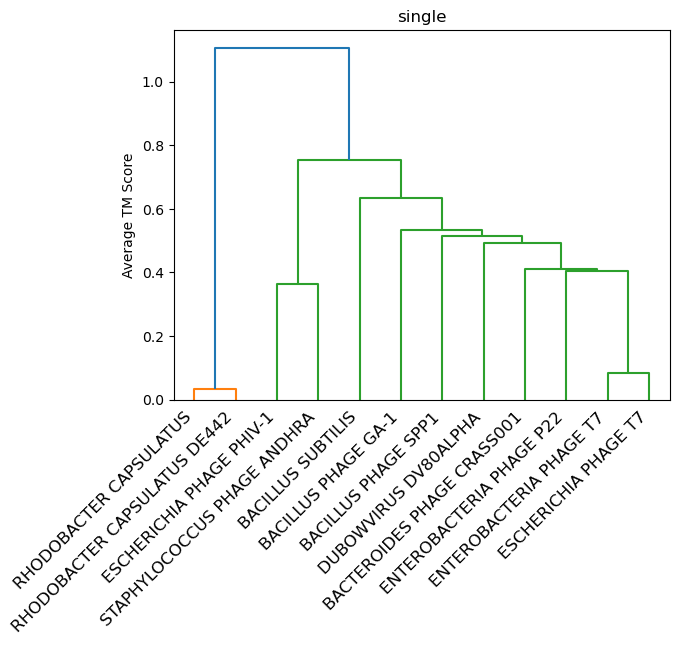

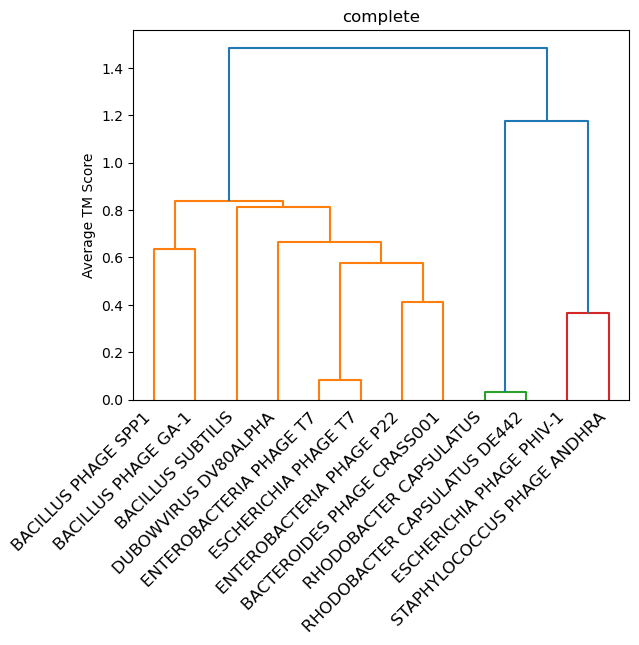

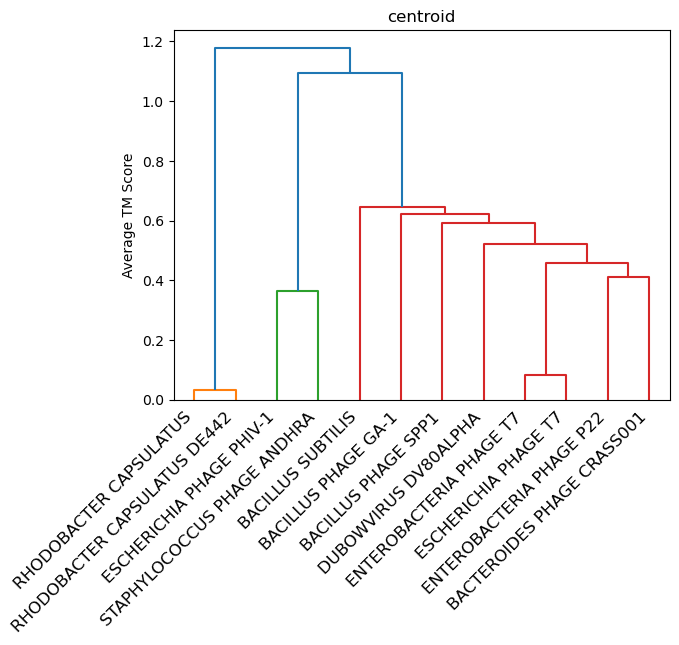

In [26]:
aln_file = "Podoviridae/aln_score_summary.txt"
metadata_file = "Podoviridae/metadata.txt"

tree, dist_matrix, metatdata_df = tree(aln_file, metadata_file, "all")


In [27]:
tree

Chain 1                      Chain 2  Chain 1 TM Score  \
0     BACILLUS PHAGE SPP1          BACILLUS PHAGE SPP1           0.87328   
1     BACILLUS PHAGE SPP1     ENTEROBACTERIA PHAGE P22           0.49797   
2     BACILLUS PHAGE SPP1     ENTEROBACTERIA PHAGE P22           0.52215   
3     BACILLUS PHAGE SPP1     ENTEROBACTERIA PHAGE P22           0.52815   
4     BACILLUS PHAGE SPP1      ENTEROBACTERIA PHAGE T7           0.50407   
..                    ...                          ...               ...   
751  DUBOWVIRUS DV80ALPHA            BACILLUS SUBTILIS           0.76371   
752  DUBOWVIRUS DV80ALPHA     ESCHERICHIA PHAGE PHIV-1           0.25188   
753  DUBOWVIRUS DV80ALPHA         ESCHERICHIA PHAGE T7           0.58472   
754  DUBOWVIRUS DV80ALPHA  STAPHYLOCOCCUS PHAGE ANDHRA           0.21911   
755  DUBOWVIRUS DV80ALPHA         DUBOWVIRUS DV80ALPHA           0.99319   

     Chain 2 TM Score  Average TM Score  
0             0.87328          0.873280  
1             0.34044          0.419205  
2             0.41886          0.470505  
3             0.37912          0.453635  
4             0.46732          0.485695  
..                ...               ...  
751           0.79347          0.778590  
752           0.09831          0.175095  
753           0.57104          0.577880  
754           0.17906          0.199085  
755           0.99319          0.993190  

[756 rows x 5 columns]

In [42]:
# kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(tree.iloc[:,2:5])


c:\Users\bunan\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


# TM align for VPC-34

In [9]:
import gzip as gz
import pandas as pd


In [10]:
# metadata
mgv_vpc_phy = "Annotations/connector/mgv_vpc_phylo.csv"
contig_file = "data/mgv_contig_info.tsv.gz"
votu_file = "data/mgv_votu_representatives.fna.gz"
host_file = "data/mgv_host_assignments.tsv.gz"

metadata_dict = {"contig_id" : [], "vpc_id" : []}

with open(mgv_vpc_phy, "rt") as f:
    for line in f:
        contig_id = line.strip().split("_")[0]
        vpc_id = line.strip().split(",")[1]
        family = line.strip().split(",")[2]
        metadata_dict["contig_id"].append(contig_id)
        metadata_dict["vpc_id"].append(vpc_id)

contig_info_dict = {"contig_id" : [], "ictv_order" : [], 	"ictv_family" : [],	"ictv_genus" : [],}

with gz.open(contig_file, "rt") as f:
    for line in f:  
        contig_info_dict["contig_id"].append(line.strip().split("\t")[0])
        contig_info_dict["ictv_order"].append(line.strip().split("\t")[11])
        contig_info_dict["ictv_family"].append(line.strip().split("\t")[12])
        contig_info_dict["ictv_genus"].append(line.strip().split("\t")[13])

contig_info_df = pd.DataFrame(contig_info_dict)
host_df = pd.read_csv(host_file, sep="\t")
metadata_df = pd.DataFrame(metadata_dict)
metadata_df = metadata_df.merge(contig_info_df, on="contig_id", how="left")
metadata_df = metadata_df.merge(host_df, on="contig_id", how="left")


In [11]:
classification = {i : "" for i in metadata_df["contig_id"]}
for index, row in metadata_df.iterrows():
    if row["ictv_genus"] != "NULL": 
        classification[row["contig_id"]] = row["ictv_genus"]
    elif row["ictv_family"] != "NULL":
        classification[row["contig_id"]] = row["ictv_family"]
    elif row["ictv_order"] != "NULL":
        classification[row["contig_id"]] = row["ictv_order"]


KeyboardInterrupt: 

In [ ]:
# create a column from index and drop index

temp = pd.DataFrame(classification, index=[0])
temp["contig_id"] = temp.index
temp = temp.T
temp 

0
MGV-GENOME-0122125  Caudovirales
MGV-GENOME-0079567   Podoviridae
MGV-GENOME-0051864   Podoviridae
MGV-GENOME-0121514   Podoviridae
MGV-GENOME-0174804  Caudovirales
...                          ...
MGV-GENOME-4034759   Podoviridae
MGV-GENOME-0061320   Podoviridae
MGV-GENOME-0123609   Podoviridae
MGV-GENOME-0081865  Caudovirales
contig_id                      0

[19272 rows x 1 columns]

# K Means Clustering

In [ ]:
# kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(temp)
kmeans.cluster_centers_

In [ ]:
import gzip as gz

filename = "data/mgv_votu_representatives.fna.gz"

with gz.open(filename, "rt") as f:
    i = 0
    for line in f.readlines():
        print(line)
        i += 1
        if i > 10: break

>MGV-GENOME-0364349 OTU-48849

ATTTTTTTTTAGTTTTCACACACACAAAATAACTCGTAAAAATTTTTTTATATTAGAAAAATCCATAATCTACTACTCCAAAAGGTAAGTAGTCACAAGGAACAAAATATAGTGTCACATCAAAATCATTGAGTTTATAAGTAAAGGAACTAACTCCTAATTTAGGATTACTCAATAACGCTTTTATAAGTGCACTATCAGCATAACAGTATATCATCCTTGGTAATTCTAAATTTTGCTCTGCTTTTTCATGTAATTTATTAGTTATGTCATCTACTACTGTACTAAGTAATTCTTTACCTTTAATTAAGTTTATCATATCAATCTTGGTTGGTTACACATATAAAACGTAGTAAAGTAGATGGTATATCTACACATTAACAAGCATTAACTATTATATAAAAGGCAATAAGTAAATAGTTAAAAACTGTTAATTATAGTACAAGTTAGTACAACCTAAGTAAGAACATATACGTTTATAGGGGAGTAAGAGGGGTTAGTAATTACATAGTATATACATACTAATTAACTAATAATCTACTCTTACTTTACTAATTACTTTATAATAATTATATACTATGGCAAATAAGATATTAAATACTAGTAAGAGACAACCAATCGCATATCCAGGTAAATATGTAGATGTAAATGGTAAAGACTTTTTCTTAGTAATGGAAACAGATCAAAGTAGCTGTAAAGGTTGTGCTTTCCTGAATACAGGATGTGATGCAAATAGAACTGCTTACTGTACTCAGGGTTATATTTTCAAAGAAGTAATTTTAGATTTAAATAAAAAGTAATGTACATATACGATAAAGAGTTAGCTGAGATTATTAAGAATAATATACCAGTTGAGATAAATAGTAAACAGTACTTAATTGAAGCTAATAAGTCTGGTAGTTGTGATGGCTGTGCATTTGGTGATCTAACAAAGTGTCCTTCTAGAGCTGTACATTTTTGTTGCTCAAA

In [18]:
filename = "data/uhgg_spacers.fna.gz"
with gz.open(filename, "rt") as f:
    i = 0
    for line in f.readlines():
        print(line)
        i += 1
        if i > 10: break

>GUT_GENOME146689|accn|CXHB01000030|1|1

TGTCACACGCAGATAAATCCAACTTTCAATATTGTTAAGTTC

>GUT_GENOME146689|accn|CXHB01000030|1|2

CATGGCGTAGAAAAAAGAAATTTTCAATATTGCTTTATGG

>GUT_GENOME223978|SRS1719483|3|k119_13093|1|1

ACTGCCTGCGTAGGAACAAACTTGTATCT

>GUT_GENOME223978|SRS1719483|3|k119_13093|1|2

AAGGTCCTCAACCTTGTGTTCGTCATATTG

>GUT_GENOME223978|SRS1719483|3|k119_13093|1|3

TCGTGAGGTTGACAGCTCAACAGATGACGG

>GUT_GENOME223978|SRS1719483|3|k119_13093|1|4



# Side Project

- see association btw diseases / gender / country and bacteriophage population distribution

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("data/mgv_sample_info.tsv.gz", sep="\t")
df = df[["contig_id", "continent", "country_code", "sex", "age", "health", "disease"]]
df_sex = df[df['sex'].notna()]
df_sex["country_code"].unique()

array(['CHN', 'FRA', 'DNK', 'AUT', 'SWE', 'DEU', 'ESP', 'USA', 'TZA',
       'SLV', 'EST', 'ITA', 'RUS', 'FIN', 'PER'], dtype=object)

In [15]:
df_human_phage = pd.merge(metadata_df, df_sex, on="contig_id", how="left")
test_set = df_human_phage[['ictv_order', 'ictv_family', 'ictv_genus',
       'host_domain', 'host_phylum', 'host_class', 'host_order', 'host_family',
       'host_genus', 'host_species', 'sex']]
test_set
df_human_phage

# do some linear regression first?

contig_id     vpc_id    ictv_order  ictv_family ictv_genus  \
0      MGV-GENOME-0122125   VPC-1085  Caudovirales         NULL       NULL   
1      MGV-GENOME-0079567     VPC-34  Caudovirales  Podoviridae       NULL   
2      MGV-GENOME-0051864   VPC-1427  Caudovirales  Podoviridae       NULL   
3      MGV-GENOME-0121514     VPC-34  Caudovirales  Podoviridae       NULL   
4      MGV-GENOME-0174804   VPC-1085  Caudovirales         NULL       NULL   
...                   ...        ...           ...          ...        ...   
19297  MGV-GENOME-0118422   VPC-3264  Caudovirales         NULL       NULL   
19298  MGV-GENOME-4034759   VPC-1350  Caudovirales  Podoviridae       NULL   
19299  MGV-GENOME-0061320   VPC-1350  Caudovirales  Podoviridae       NULL   
19300  MGV-GENOME-0123609     VPC-34  Caudovirales  Podoviridae       NULL   
19301  MGV-GENOME-0081865   VPC-1427  Caudovirales         NULL       NULL   

      host_domain       host_phylum      host_class        host_order  \
0        Bacteria      Bacteroidota     Bacteroidia     Bacteroidales   
1        Bacteria      Firmicutes_A      Clostridia   Oscillospirales   
2        Bacteria      Firmicutes_A      Clostridia    Lachnospirales   
3             NaN               NaN             NaN               NaN   
4        Bacteria      Bacteroidota     Bacteroidia     Bacteroidales   
...           ...               ...             ...               ...   
19297    Bacteria  Actinobacteriota  Coriobacteriia  Coriobacteriales   
19298    Bacteria      Bacteroidota     Bacteroidia     Bacteroidales   
19299         NaN               NaN             NaN               NaN   
19300    Bacteria      Firmicutes_A      Clostridia   Oscillospirales   
19301         NaN               NaN             NaN               NaN   

             host_family        host_genus      host_species continent  \
0         Tannerellaceae   Parabacteroides  GUT_GENOME143131    Europe   
1        Ruminococcaceae  Ruthenibacterium  GUT_GENOME239663       NaN   
2        Lachnospiraceae         Blautia_A  GUT_GENOME000623       NaN   
3                    NaN               NaN               NaN       NaN   
4         Bacteroidaceae     Bacteroides_A  GUT_GENOME095979       NaN   
...                  ...               ...               ...       ...   
19297  Coriobacteriaceae       Collinsella  GUT_GENOME240703       NaN   
19298     Bacteroidaceae        Prevotella  GUT_GENOME140299       NaN   
19299                NaN               NaN               NaN       NaN   
19300    Ruminococcaceae  Faecalibacterium  GUT_GENOME147678       NaN   
19301                NaN               NaN               NaN       NaN   

      country_code     sex   age health  disease  
0              ESP  female  51.0    NaN      NaN  
1              NaN     NaN   NaN    NaN      NaN  
2              NaN     NaN   NaN    NaN      NaN  
3              NaN     NaN   NaN    NaN      NaN  
4              NaN     NaN   NaN    NaN      NaN  
...            ...     ...   ...    ...      ...  
19297          NaN     NaN   NaN    NaN      NaN  
19298          NaN     NaN   NaN    NaN      NaN  
19299          NaN     NaN   NaN    NaN      NaN  
19300          NaN     NaN   NaN    NaN      NaN  
19301          NaN     NaN   NaN    NaN      NaN  

[19302 rows x 18 columns]

In [17]:
# Get the number of non NaN values in each column
for i in df_human_phage.columns:
    print(f"| {i} | {len(df_human_phage.loc[df_human_phage[i].notna()])}|")


| contig_id | 19302|
| vpc_id | 19302|
| ictv_order | 19302|
| ictv_family | 19302|
| ictv_genus | 19302|
| host_domain | 14196|
| host_phylum | 13948|
| host_class | 13946|
| host_order | 13191|
| host_family | 12564|
| host_genus | 10308|
| host_species | 7829|
| continent | 6774|
| country_code | 6774|
| sex | 6774|
| age | 5731|
| health | 1589|
| disease | 0|


### One Hot Encoding

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # Assuming that test_set is your DataFrame
# onehotencoder = OneHotEncoder()

# # Apply one-hot encoder to each column with categorical data
# ct = ColumnTransformer(
#     transformers=[
#         ("OneHot", onehotencoder, list(test_set.select_dtypes(include=['object']).columns))
#     ], remainder="passthrough"
# )

# test_set = ct.fit_transform(test_set)
# test_set = pd.DataFrame(test_set)
# test_set

test_set

new = {}
for i in test_set.columns:
    for j in test_set[i].unique():
        # if j != "NULL" and j != "nan" and j != "NaN" and j != "NAN" and j != "nan": 
        new[j] = [0] * test_set.index
new_df = pd.DataFrame(columns=new.keys(), index=test_set.index)

# SUPER SLOW (1 min 7 seconds)
new_df = pd.DataFrame(new, index=test_set.index)
for k in test_set.index:
    for l in test_set.columns:
        if test_set[l][k] in new.keys():
            new_df[test_set[l][k]][k] = 1
        else:
            new_df[test_set[l][k]][k] = 0
new_df
            
# IS SOMEHOW EVEN SLOWER
# for k in test_set.index:
#     for l in test_set.columns:
#         if test_set[l][k] in new.keys():
#             new[test_set[l][k], k] = 1
# new_df = pd.DataFrame(new)
# new_df

# remove NULL column
new_df = new_df.drop(columns="NULL")
new_df

Caudovirales  Zurhausenvirales  Podoviridae  Siphoviridae  Myoviridae  \
0                 1                 0            0             0           0   
1                 1                 0            1             0           0   
2                 1                 0            1             0           0   
3                 1                 0            1             0           0   
4                 1                 0            0             0           0   
...             ...               ...          ...           ...         ...   
19297             1                 0            0             0           0   
19298             1                 0            1             0           0   
19299             1                 0            1             0           0   
19300             1                 0            1             0           0   
19301             1                 0            0             0           0   

       Papillomaviridae  crAss-phage  Salasvirus  Cepunavirus  Hendrixvirus  \
0                     0            0           0            0             0   
1                     0            0           0            0             0   
2                     0            0           0            0             0   
3                     0            0           0            0             0   
4                     0            0           0            0             0   
...                 ...          ...         ...          ...           ...   
19297                 0            0           0            0             0   
19298                 0            0           0            0             0   
19299                 0            0           0            0             0   
19300                 0            0           0            0             0   
19301                 0            0           0            0             0   

       ...  GUT_GENOME001578  GUT_GENOME212645  GUT_GENOME155674  \
0      ...                 0                 0                 0   
1      ...                 0                 0                 0   
2      ...                 0                 0                 0   
3      ...                 0                 0                 0   
4      ...                 0                 0                 0   
...    ...               ...               ...               ...   
19297  ...                 0                 0                 0   
19298  ...                 0                 0                 0   
19299  ...                 0                 0                 0   
19300  ...                 0                 0                 0   
19301  ...                 0                 0                 0   

       GUT_GENOME141414  GUT_GENOME198628  GUT_GENOME000735  GUT_GENOME008083  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
19297                 0                 0                 0                 0   
19298                 0                 0                 0                 0   
19299                 0                 0                 0                 0   
19300                 0                 0                 0                 0   
19301                 0                 0                 0                 0   

       GUT_GENOME105496  female  male  
0                     0       1     0  
1                     0       0     0  
2                     0       0     0  
3                     0       0     0  
4                     0       0     0  
...                 ...     ...   ...  
19297                 0    

### PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = new_df.columns[:-2]
x = new_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
normalized_x = pd.DataFrame(x,columns=features)
normalized_x.tail()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df = principal_df.sort_values(by="principal component 1")
pc_1 = principal_df[-5:]
# select everything but the last 5 rows
pc_2 = principal_df[:-5]
pc_2
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


principal component 1  principal component 2
7273               -1.786103              -2.742238
12731              -1.786103              -2.742238
2470               -1.612361              -2.174777
17162              -0.942032               0.950439
4977               -0.942032               0.950439
...                      ...                    ...
9563                0.702748              -0.965408
633                 0.702748              -0.965408
6725                0.994312              -1.062482
6071                0.994312              -1.062482
10651               1.107904              -3.821184

[19297 rows x 2 columns]

<Figure size 640x480 with 0 Axes>

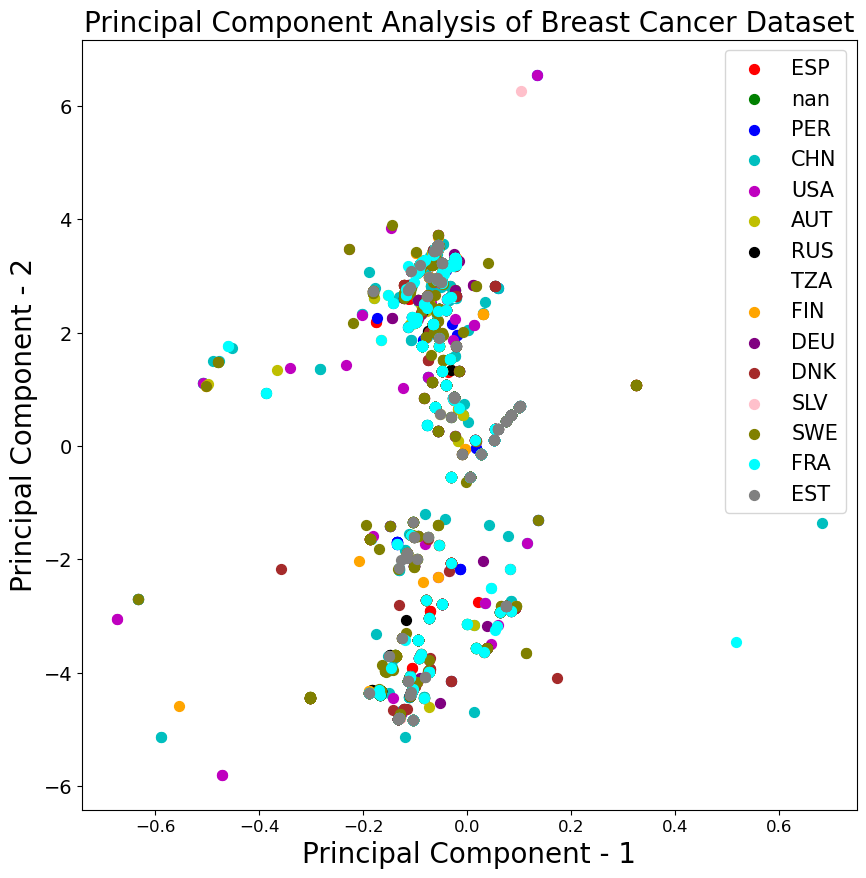

<Figure size 640x480 with 0 Axes>

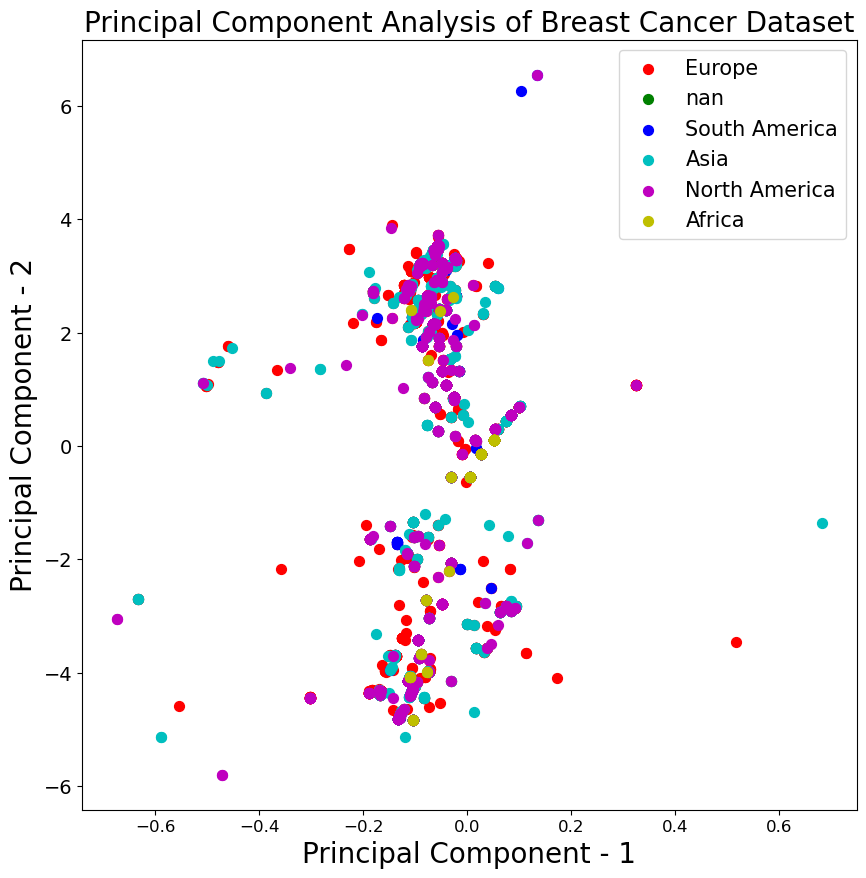

<Figure size 640x480 with 0 Axes>

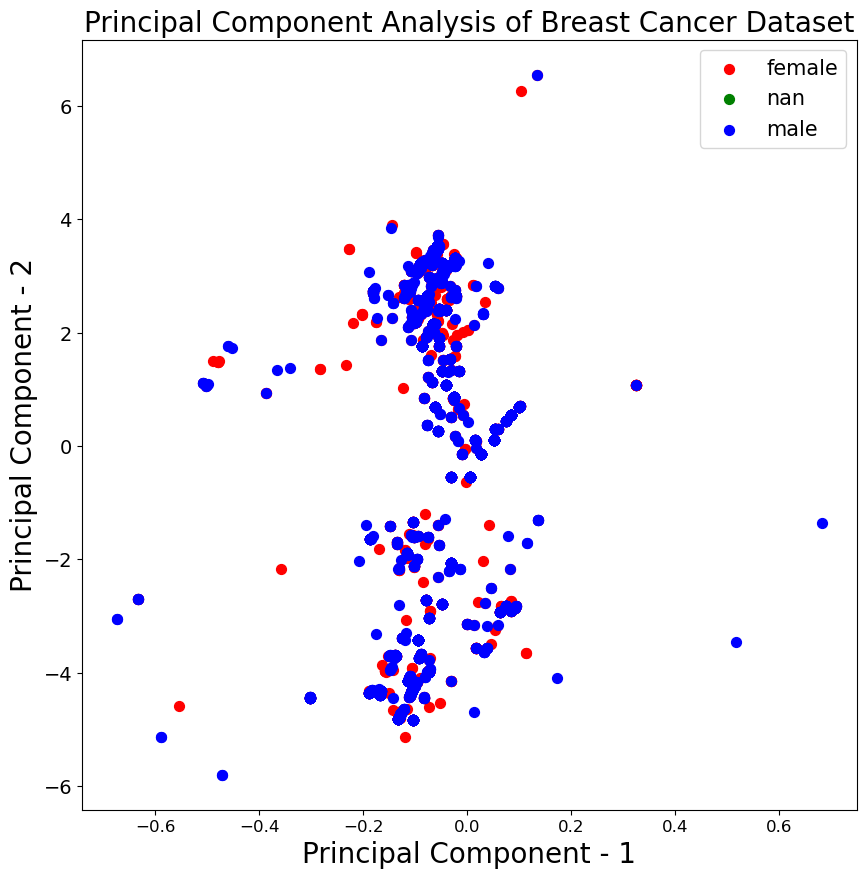

<Figure size 640x480 with 0 Axes>

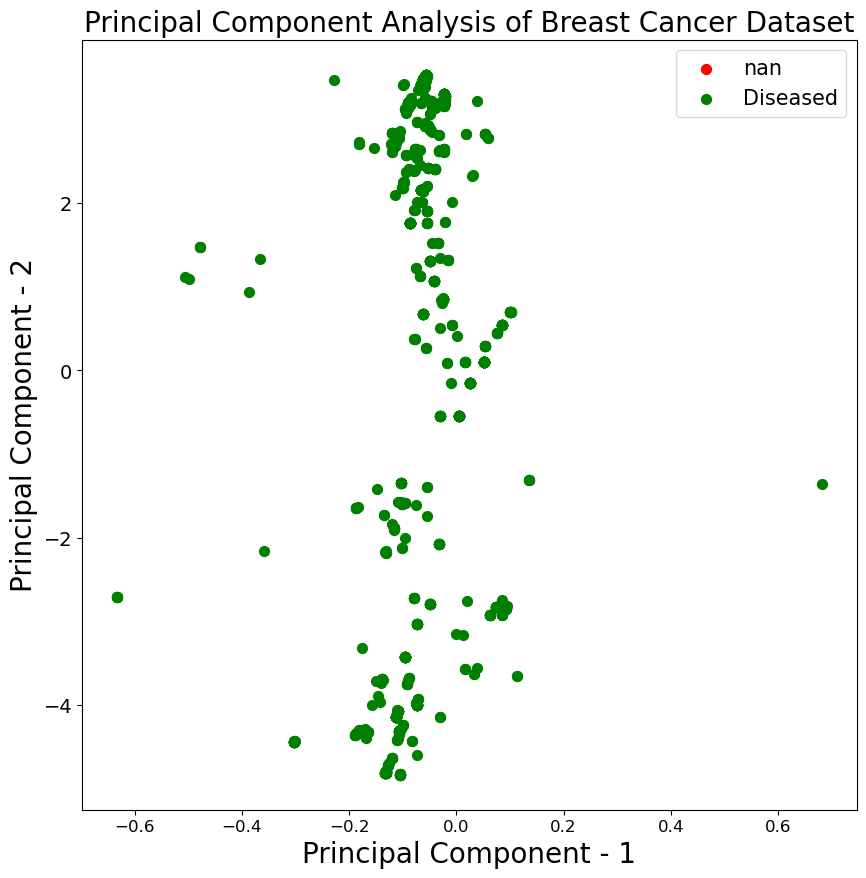

<Figure size 640x480 with 0 Axes>

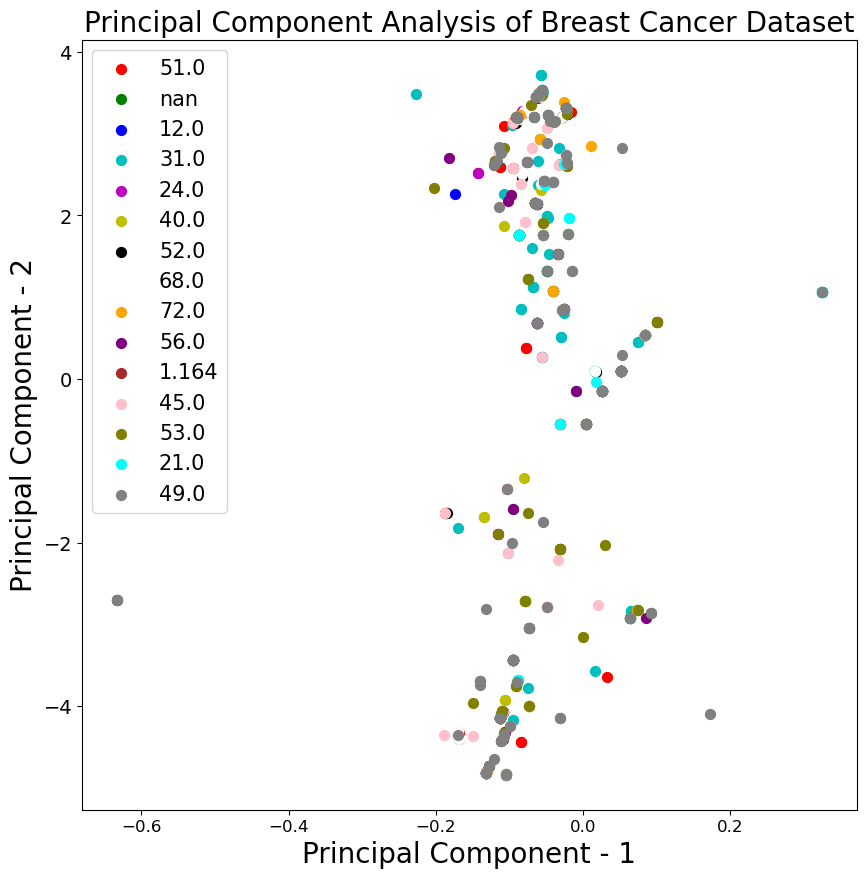

In [55]:
def plot_pca(principal_df, df, column):
       plt.figure()
       plt.figure(figsize=(10,10))
       plt.xticks(fontsize=12)
       plt.yticks(fontsize=14)
       plt.xlabel('Principal Component - 1',fontsize=20)
       plt.ylabel('Principal Component - 2',fontsize=20)
       plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
       targets = df_human_phage[column].unique()
       all_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', 'grey']
       colors = all_colors[:len(targets)]
       for target, color in zip(targets,colors):
              indicesToKeep = df[column] == target
              plt.scatter(principal_df.loc[indicesToKeep, 'principal component 1']
                            , principal_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

              plt.legend(targets,prop={'size': 15})

plot_pca(pc_2, df_human_phage, column = "country_code")
plot_pca(pc_2, df_human_phage, column = "continent")
plot_pca(pc_2, df_human_phage, column = "sex")
plot_pca(pc_2, df_human_phage, column = "health")
plot_pca(pc_2, df_human_phage, column = "age")


In [52]:
targets = df_human_phage["continent"].unique()
all_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', 'grey']
colors = all_colors[:len(targets)]
colors

['r', 'g', 'b', 'c', 'm', 'y']

In [24]:
# PCA?
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = new_df.iloc[:, :-2].values
x = StandardScaler().fit_transform(x)
# print everything but the last column of test_set
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(new_df.values)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print(df_pca.head())
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



        PC1       PC2
0  1.155805  0.633378
1 -0.924319 -0.013218
2 -1.356401  0.328860
3  0.178045 -1.072679
4  1.424670  0.716112
Explained variation per principal component: [0.19870893 0.14665585]


In [42]:
amino_acid_codes = {'A': 'Ala',
                    'R': 'Arg',
                    'N': 'Asn',
                    'D': 'Asp',
                    'C': 'Cys',
                    'Q': 'Gln',
                    'E': 'Glu',
                    'G': 'Gly',
                    'H': 'His',
                    'I': 'Ile',
                    'L': 'Leu',
                    'K': 'Lys',
                    'M': 'Met',
                    'F': 'Phe',
                    'P': 'Pro',
                    'S': 'Ser',
                    'T': 'Thr',
                    'W': 'Trp',
                    'Y': 'Tyr',
                    'V': 'Val'}

c_f = {'alpha': {'Ala': 1.45, 'Arg': 0.79, 'Asn': 0.73, 'Asp': 0.98, 'Cys': 0.77, 'Gln': 1.17, 'Glu': 1.53, 'Gly': 0.53, 'His': 1.24, 'Ile': 1.00, 'Leu': 1.34, 'Lys': 1.07, 'Met': 1.20, 'Phe': 1.12, 'Pro': 0.59, 'Ser': 0.79, 'Thr': 0.82, 'Trp': 1.14, 'Tyr': 0.61, 'Val': 1.14}, 
       'beta': {'Ala': 0.97, 'Arg': 0.90, 'Asn': 0.65, 'Asp': 0.80, 'Cys': 1.30, 'Gln': 1.23, 'Glu': 0.26, 'Gly': 0.81, 'His': 0.71, 'Ile': 1.60, 'Leu': 1.22, 'Lys': 0.74, 'Met': 1.17, 'Phe': 1.28, 'Pro': 0.62, 'Ser': 0.72, 'Thr': 1.20, 'Trp': 1.19, 'Tyr': 1.29, 'Val': 1.65}}


# seq = "TSPTAELMRSTG"
# alpha = []
# beta = []
# for i in seq:
#     alpha.append(c_f["alpha"][amino_acid_codes[i]])
#     beta.append(c_f["beta"][amino_acid_codes[i]])
# avg = 0
# print("alpha")
# for j in range(5, len(alpha)+1):
#     avg = sum(alpha[j-6:j])/6
#     # print(avg)
#     print(f"{seq[j-6:j]}, {alpha[j-6:j]}, {avg}")
# avg = 0
# print("beta")
# for k in range(4, len(seq)+1):
#     # print(seq[k-5:k])
#     avg = sum(beta[k-5:k])/5
#     # print(avg)
#     print(f"{seq[k-5:k]}, {beta[k-5:k]}, {avg}")


# alt method

seq = "TSPTAELMRSTG"
alpha = []
beta = []
for i in seq:
    alpha.append(c_f["alpha"][amino_acid_codes[i]])
    beta.append(c_f["beta"][amino_acid_codes[i]])

helix = []
print("alpha")
for j in range(5, len(alpha)+1):
    print([m > 1 for m in alpha[j-6:j]].count(True))
    # print(f"{seq[j-6:j]}, {alpha[j-6:j]}, {avg}")
avg = 0
print("beta")
for k in range(4, len(seq)+1):
    print([m > 1 for m in beta[k-5:k]].count(True))
    # print(seq[k-5:k])
    # avg = sum(beta[k-5:k])/5
    # print(avg)
    # print(f"{seq[k-5:k]}, {beta[k-5:k]}, {avg}")

alpha
0
2
3
4
4
4
3
2
beta
0
2
1
2
3
2
2
3
2


In [38]:
x = [0.82, 0.79, 0.59, 0.82, 1.45, 1.53]
sum(x)

6.0

In [1]:
import gzip as gz

with gz.open("Podoviridae/8vdc.pdb.gz", "rt") as f:
    for line in f:
        print(line)

HEADER    STRUCTURAL PROTEIN                      14-DEC-23   8VDC              

TITLE     SAPI1 PORTAL STRUCTURE IN MATURE CAPSIDS WITHOUT DNA                  

COMPND    MOL_ID: 1;                                                            

COMPND   2 MOLECULE: PORTAL PROTEIN;                                            

COMPND   3 CHAIN: A;                                                            

COMPND   4 ENGINEERED: YES;                                                     

COMPND   5 MOL_ID: 2;                                                           

COMPND   6 MOLECULE: CONNECTOR;                                                 

COMPND   7 CHAIN: B;                                                            

COMPND   8 ENGINEERED: YES                                                      

SOURCE    MOL_ID: 1;                                                            

SOURCE   2 ORGANISM_SCIENTIFIC: DUBOWVIRUS DV80ALPHA;                           

SOURCE   3 ORGAN

# LeetCode

In [ ]:
nums = [10,9,2,5,3,7,101,18]
x = []
for i in range(0, len(nums)-1)[::-1]:
    if len(x) == 0:
        if nums[i] >= nums[i-1]:
            x.append(nums[i])
            x.append(nums[i-1])
    else:
        if nums[i] < x[len(x)-1]:
            x.append(nums[i])
print(x)


[101, 7, 3, 2]


In [ ]:
# Given an integer array nums, return the length of the longest strictly increasing subsequence

def lengthOfLIS(nums):
    x = []
    for i in range(1, len(nums)-1):
        if len(x) == 0:
            if nums[i] >= nums[i-1]:
                x.append(nums[i-1])
                x.append(nums[i])
        else:
            if nums[i] > x[len(x)-1]:
                x.append(nums[i])
    print(x)
    return len(x)

lengthOfLIS([10,9,2,5,3,7,101,18])
lengthOfLIS([0,1,0,3,2,3])


[2, 5, 7, 101]
[0, 1, 3]


3

## addTwoNumbers

In [ ]:
def addTwoNumbers(l1, l2):
    out = []
    x = 0
    for i, j in zip(l1, l2):
        sum = (i + j)
        if x == 1:
            out.append((sum % 10) + 1)
        if sum > 10:
            x = 1
    return out

# addTwoNumbers([2,4,3], [5,6,4])
addTwoNumbers([0], [0])

[]

## zigzag

In [ ]:
def convert(s: str, numRows: int) -> str:
    letters = {key: [] for key in range(0, numRows)}
    out = ""
    increment = numRows + (numRows - 2)
    for i in range(1, round(len(s)/increment)*2):
        print(i, letters)
        if numRows % i == 0:
            print(i, s[int(i/numRows) * increment:int(i/numRows) * increment + numRows])
            for j in range(0, numRows):
                letters[j] += s[int(i/numRows) * increment:int(i/numRows) * increment + numRows][j]
        else:
            print(i % numRows - 1, s[(i % numRows - 1) * increment + 1 : (i % numRows - 1) * increment + 2])
            letters[i % numRows - 1] += s[(i-1)*numRows:(i-1)*numRows+1]
    for k in range(0, numRows):
        out += "".join(letters[k])
    return out

convert("PAYPALISHIRING", 3)

1 {0: [], 1: [], 2: []}
1 PAY
2 {0: ['P'], 1: ['A'], 2: ['Y']}
1 L
3 {0: ['P'], 1: ['A', 'P'], 2: ['Y']}
3 ALI
4 {0: ['P', 'A'], 1: ['A', 'P', 'L'], 2: ['Y', 'I']}
0 A
5 {0: ['P', 'A', 'I'], 1: ['A', 'P', 'L'], 2: ['Y', 'I']}
1 L
6 {0: ['P', 'A', 'I'], 1: ['A', 'P', 'L', 'N'], 2: ['Y', 'I']}
-1 I


KeyError: -1

In [ ]:
def convert(s: str, numRows: int) -> str:
    letters = {key: [] for key in range(0, numRows)}
    increment = numRows + (numRows - 2) if numRows > 2 else numRows
    limit = len(s) if len(s) > numRows+1 else numRows+1
    for i in range(0, limit):
        print(i, letters)
        print(i, s[i * increment : i * increment + numRows])
        for j in range(i * increment, i * increment + numRows):
            if j >= len(s):
                return join_dict(letters, numRows)
            else:
                letters[j % increment] += s[j]  
        for k in range(1, numRows - 1)[::-1]:
            if (i + 1) * increment - k > len(s):
                return join_dict(letters, numRows)
            print(i, s[(i + 1) * increment - k : (i + 1) * increment - k + 1])
            letters[k] +=  s[(i + 1) * increment - k : (i + 1) * increment - k + 1]
    return join_dict(letters, numRows)
def join_dict(d, numRows):
    out = ""
    for l in range(0, numRows):
        out += "".join(d[l])
    return out      

convert("ABC", 1)

0 {0: []}
0 A
1 {0: ['A']}
1 B
2 {0: ['A', 'B']}
2 C


'ABC'

## Roman numeral

In [ ]:


def romanToInt(s: str) -> int:
    numeral = { "I": 1, 
                "V" : 5, 
                "X" : 10, 
                "L" : 50, 
                "C" : 100, 
                "D" : 500, 
                "M" : 1000,
                 "," : 0 }
    alt = { "IV" : 4,
            "IX" : 9,
            "XL" : 40,
            "XC" : 90,
            "CD" : 400,
            "CM" : 900 }
    tot = 0
    num = [*s]
    for i in range(0, len(num)):
        if i == len(num) - 1:
            tot += numeral[num[i]]
        elif num[i] == ",":
            continue
        elif numeral[num[i]] < numeral[num[i+1]] and num[i] != "," and num[i+1] != ",":
            tot += alt[num[i] + num[i+1]]
            num[i+1] = ","
        else:
            tot += numeral[num[i]]
    return tot

romanToInt("MCMXCIV")

3 0 1000 100 ['M', 'C', 'M', 'X', 'C', 'I', 'V'] 1000
2 1 ['M', 'C', ',', 'X', 'C', 'I', 'V'] 1900
2 3 ['M', 'C', ',', 'X', ',', 'I', 'V'] 1990
2 5 ['M', 'C', ',', 'X', ',', 'I', ','] 1994
1 6 ['M', 'C', ',', 'X', ',', 'I', ','] 1994


1994

## isMatch

In [ ]:
# isMatch

def isMatch(s: str, p: str) -> bool:
    # Given an input string s and a pattern p, implement regular expression matching with support for '.' and '*' where:
    # '.' Matches any single character.​​​​
    # '*' Matches zero or more of the preceding element.
    for i in range(len(p)):
        for j in range(i, len(s)):
            print(p[i], s[j])
            if p[i] == ".": break
            if p[i] == "*":
                if p[i-1] == ".": return True
                else:
                    for k in range(j, len(s)):
                        if s[k] != s[j]: break
                    if k == len(s) - 1: return True
                    else: break
            if p[i] == s[j]: break
            elif p[i] != s[j]: return False
        if i == len(p) - 1 and j == len(s) - 1: return True
    return False


# isMatch("aaaaa", "a*") : True
# isMatch("aa", "a") : False

# if it gets to end of s

            


True

In [ ]:
import numpy as np

In [ ]:
# matrix method

def isMatch(s: str, p: str) -> bool:
    matrix = np.zeros((len(s) + 1, len(p) - p.count("*") + 1))
    for i in range(1, len(p)):
        if p[i] == "*":
            matrix[0][i] = p[i-1] + "*"
        else:
            matrix[0][i] = p[i]

    print(matrix)

isMatch("aab", "c*a*b")




ValueError: could not convert string to float: 'c*'

In [ ]:
def isMatch(s: str, p: str) -> bool:
    count = 0
    if p == ".*": return True
    for i in range(0, len(p)):
        for j in range(count, len(s)):
            print(count, i, j, p[i], s[j])
            if p[i] == "*": break
            elif p[i] == ".": 
                if i < len(p) - 1:
                    if p[i+1] == "*": break
                count += 1
                break
            if i < len(p) - 1:
                 if p[i+1] == "*":
                    for k in range(j, len(s)):
                        print(k, s[k], p[i], count)
                        if s[k] != p[i]: break
                        else: count += 1
                    if count < len(s): break
                    elif k == len(s) - 1 and count == len(s): return True
            if i != len(p) - 1 and j == len(s) - 1 and count != len(s) - 1: return False
            if p[i] != s[j]: return False
            if p[i] == s[j]:
                count += 1
                break
        if i == len(p) - 1 and j == len(s) - 1: return True
    return False

# isMatch("asdf", "as.f") # true
# isMatch("aab", "c*a*b") # true
# isMatch("aa", "a*") # true
# isMatch("mississippi", "mis*is*ip*.") # true
# isMatch("aaa", "aaaa") # false
# isMatch("aaa", "ab*a") # false
# isMatch("aaa", ".*")
# isMatch("ab", ".*c")
isMatch("a", "ab*")

0 0 0 a a


IndexError: string index out of range

## Phone number combinations

In [ ]:
import itertools 

def letterCombinations(digits: str):
    phone = {   2: "abc", 
                3: "def", 
                4: "ghi", 
                5: "jkl",
                6: "mno", 
                7: "pqrs", 
                8: "tuv", 
                9: "wxyz", 
                0: " "}
    numbers = [phone[int(i)] for i in [*digits]]
    out = {}
    new = []
    if len(numbers) > 0: 
        for i in range(0, len(numbers[0])): # loop thru first word
            out[numbers[0][i]] = [numbers[0][i]]
        for j in range(1, len(numbers)): # loop thru rest of words
            for key, value in out.items(): # loop thru out
                new = []
                for k in range(0, len(numbers[j])): # loop thru each letter in word
                    for val in value:
                        new += [val + numbers[j][k]]
                out[key] = new
    return list(itertools.chain(*list(out.values())))
letterCombinations("23")

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

## Find First Occurence in a String

In [ ]:
def strStr(haystack: str, needle: str) -> int:
    indices = []
    for i in range(0, len(haystack)):
        if haystack[i] == needle[0]:
            if len(needle) == 1: indices.append(i)
            else:
                for j, k in zip(range(1, len(needle)), range(i+1, i + len(needle))):
                    if k < len(haystack):
                        if needle[j] != haystack[k]: break
                        if j == len(needle) - 1: indices.append(i)
    if len(indices) == 0: indices += [-1]
    return indices[0]

strStr("dddaaa", "aaa")

3

## Valid Sudoku

In [ ]:
def isValidSudoku(board) -> bool:
    check = []
    # check row
    for i in range(0, len(board)):
        check = [j for j in board[i] if j != "."]
        if len(set(check)) != len(check): return False
    # check col
    check = []
    for k in range(0, len(board[0])):
        for l in range(0, len(board)):
            if board[l][k] != ".": check.append(board[l][k])
        print(check)
        if len(set(check)) != len(check): return False
        check = []
    # check box
    check = []
    for m in range(0, 3):
        for n in range(0, 3):
            for o in range(0, 3):
                for p in range(0, 3):
                    if board[m*3 + o][n*3 + p] != ".":
                        check.append(board[m*3 + o][n*3 + p])
            if len(set(check)) != len(check): return False
            check = []
    return True


# test = [["5","3",".",".","7",".",".",".","."]
# ,["6",".",".","1","9","5",".",".","."]
# ,[".","9","8",".",".",".",".","6","."]
# ,["8",".",".",".","6",".",".",".","3"]
# ,["4",".",".","8",".","3",".",".","1"]
# ,["7",".",".",".","2",".",".",".","6"]
# ,[".","6",".",".",".",".","2","8","."]
# ,[".",".",".","4","1","9",".",".","5"]
# ,[".",".",".",".","8",".",".","7","9"]] # true

test2 = [["8","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
# false

isValidSudoku(test2)
# isValidSudoku(test2)

['8', '6', '8', '4', '7']


False

## Determine if Two Strings Are Close

- Operation 1: Swap any two existing characters.
    - For example, abcde -> aecdb
- Operation 2: Transform every occurrence of one existing character into another existing character, and do the same with the other character.
    - For example, aacabb -> bbcbaa (all a's turn into b's, and all b's turn into a's)

Example 1:

Input: word1 = "abc", word2 = "bca"
Output: true
Explanation: You can attain word2 from word1 in 2 operations.
Apply Operation 1: "abc" -> "acb"
Apply Operation 1: "acb" -> "bca"
Example 2:

Input: word1 = "a", word2 = "aa"
Output: false
Explanation: It is impossible to attain word2 from word1, or vice versa, in any number of operations.
Example 3:

Input: word1 = "cabbba", word2 = "abbccc"
Output: true
Explanation: You can attain word2 from word1 in 3 operations.
Apply Operation 1: "cabbba" -> "caabbb"
Apply Operation 2: "caabbb" -> "baaccc"
Apply Operation 2: "baaccc" -> "abbccc"

In [ ]:
def closeStrings( word1: str, word2: str) -> bool:
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    transformed = transform_chr(word1, word1[0], alphabet)
    swapped = swap_letter(word1)
    temp = []
    # while word2 not in swapped or transformed:
    for i in word1:
        # for j in swapped:
        #     temp = (swap_letter(j))
        # swapped = temp
        # temp = []
        # print(swapped)
        # if word2 in swapped: return True
        for k in transformed:
            for l in k:
                temp += transform_chr(k, l, alphabet)
        transformed = temp
        print(transformed)
        temp = []
        if word2 in transformed: return True
    return False

    
        

def transform_chr(word, letter, alphabet):
    out = []
    for i in alphabet:
        out.append(word.replace(letter, i))
    return out

def swap_letter(word):
    out = []
    for i in range(0, len(word)):
        for j in range(0, len(word)):
            if i < j:
                out.append(word[0:i] + word[j] + word[i+1:j] + word[i] + word[j+1:])
            if j < i:
                out.append(word[0:j] + word[i] + word[j+1:i] + word[j] + word[i+1:])
    return out

# closeStrings("abc", "bca")
# closeStrings( "cabbba", "abbccc")
# swap_letter("abc", "a")
# transform_chr("abc", "a", "abcdefghijklmnopqrstuvwxyz")

['aabbba', 'bbbbbb', 'ccbbbc', 'ddbbbd', 'eebbbe', 'ffbbbf', 'ggbbbg', 'hhbbbh', 'iibbbi', 'jjbbbj', 'kkbbbk', 'llbbbl', 'mmbbbm', 'nnbbbn', 'oobbbo', 'ppbbbp', 'qqbbbq', 'rrbbbr', 'ssbbbs', 'ttbbbt', 'uubbbu', 'vvbbbv', 'wwbbbw', 'xxbbbx', 'yybbby', 'zzbbbz', 'aabbba', 'bbbbbb', 'ccbbbc', 'ddbbbd', 'eebbbe', 'ffbbbf', 'ggbbbg', 'hhbbbh', 'iibbbi', 'jjbbbj', 'kkbbbk', 'llbbbl', 'mmbbbm', 'nnbbbn', 'oobbbo', 'ppbbbp', 'qqbbbq', 'rrbbbr', 'ssbbbs', 'ttbbbt', 'uubbbu', 'vvbbbv', 'wwbbbw', 'xxbbbx', 'yybbby', 'zzbbbz', 'aaaaaa', 'aabbba', 'aaccca', 'aaddda', 'aaeeea', 'aafffa', 'aaggga', 'aahhha', 'aaiiia', 'aajjja', 'aakkka', 'aallla', 'aammma', 'aannna', 'aaoooa', 'aapppa', 'aaqqqa', 'aarrra', 'aasssa', 'aattta', 'aauuua', 'aavvva', 'aawwwa', 'aaxxxa', 'aayyya', 'aazzza', 'aaaaaa', 'aabbba', 'aaccca', 'aaddda', 'aaeeea', 'aafffa', 'aaggga', 'aahhha', 'aaiiia', 'aajjja', 'aakkka', 'aallla', 'aammma', 'aannna', 'aaoooa', 'aapppa', 'aaqqqa', 'aarrra', 'aasssa', 'aattta', 'aauuua', 'aavvva',

## findWinners

You are given an integer array matches where matches[i] = [winneri, loseri] indicates that the player winneri defeated player loseri in a match.

Return a list answer of size 2 where:

answer[0] is a list of all players that have not lost any matches.
answer[1] is a list of all players that have lost exactly one match.
The values in the two lists should be returned in increasing order.

Note:

You should only consider the players that have played at least one match.
The testcases will be generated such that no two matches will have the same outcome.
 

In [ ]:
Input: matches = [[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]]
Output: [[1,2,10],[4,5,7,8]]
Explanation:
Players 1, 2, and 10 have not lost any matches.
Players 4, 5, 7, and 8 each have lost one match.
Players 3, 6, and 9 each have lost two matches.
Thus, answer[0] = [1,2,10] and answer[1] = [4,5,7,8].

In [ ]:
matches = [[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]]
# set key to set of players
wins = {key: 0 for key in set([i for j in matches for i in j])}
wins

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [ ]:
def findWinners(matches):
    # wins = {key: 0 for key in set([i for j in matches for i in j])}
    losses = {key: 0 for key in set([i for j in matches for i in j])}
    for i in matches:
        # wins[i[0]] += 1
        losses[i[1]] += 1
    undefeated = []
    one_loss = []
    for key, value in losses.items():
        if value == 0: undefeated.append(key)
        if value == 1: one_loss.append(key)
    print(wins, losses)
    undefeated = sorted(undefeated)
    one_loss = sorted(one_loss)
    return [undefeated, one_loss]

matches = [[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]]
findWinners(matches)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0} {1: 0, 2: 0, 3: 2, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 2, 10: 0}


[[1, 2, 10], [4, 5, 7, 8]]

In [ ]:
matches = [[26651,85186],[19790,34845],[20238,59388],[12788,40994],[46703,28184],[49936,83960],[76158,33038],[96005,2100],[86989,72152],[73342,82931],[90852,54532],[61649,18655],[9506,73692],[56189,5503],[34939,78765],[98315,19818],[57974,42491],[5906,8266],[97215,95437],[48266,87323],[86578,82992],[29919,70323],[38749,98079],[10259,27750],[977,39147],[43625,38229],[56044,32634],[53509,13100],[59446,68045],[38379,7712],[87511,62110],[35456,508],[76381,89490],[73270,55169],[82004,20887],[11239,24195],[56561,57161],[96112,81582],[20403,76188],[77876,61782],[99546,39653],[68650,57489],[27952,11410],[10595,73394],[98154,49624],[10866,3758],[70902,97205],[43360,93218],[59119,82709],[7379,47660],[76950,1884],[20120,87138],[23010,5729],[96553,12208],[70423,36052],[98588,30989],[87447,24694],[90748,39031],[17455,13250],[49557,4501],[99624,72185],[24791,99744],[80458,57635],[16175,29359],[53170,83581],[95936,39348],[5634,95357],[58517,73348],[54861,34521],[86692,23939],[11623,85398],[7562,4748],[13217,29610],[52705,67263],[95277,68332],[50498,96263],[18070,33256],[1901,4237],[11894,97936],[22135,34362],[7698,64698],[22893,62847],[2294,14712],[69996,48778],[340,93723],[42138,33976],[53231,33755],[29512,501],[81773,58971],[19189,20321],[30220,37726],[78678,17938],[79172,26444],[67695,39219],[23206,40923],[5651,8928],[49333,29553],[98589,75052],[99636,94502],[38455,66022],[3654,56685],[42118,65465],[83831,62461],[81301,90996],[35209,23863],[99223,69931],[5206,42971],[2143,97501],[91454,60002],[6307,70975],[48194,6557],[60125,70237],[60551,85062],[58731,86177],[98064,94854],[63923,51970],[87687,36064],[37926,97759],[87685,22212],[62051,7149],[1430,13255],[55928,48428],[8319,99922],[58503,69220],[45821,70178],[56815,31101],[77963,7364],[28828,65658],[92037,99306],[97928,41984],[47086,73658],[35491,79727],[24688,42610],[32304,18289],[52770,31966],[96613,96122],[73643,49573],[27623,89143],[62163,93629],[41018,53285],[59655,4055],[80777,17295],[9744,38601]]
findWinners(matches)
# expected
# [[340,977,1430,1901,2143,2294,3654,5206,5634,5651,5906,6307,7379,7562,7698,8319,9506,9744,10259,10595,10866,11239,11623,11894,12788,13217,16175,17455,18070,19189,19790,20120,20238,20403,22135,22893,23010,23206,24688,24791,26651,27623,27952,28828,29512,29919,30220,32304,34939,35209,35456,35491,37926,38379,38455,38749,41018,42118,42138,43360,43625,45821,46703,47086,48194,48266,49333,49557,49936,50498,52705,52770,53170,53231,53509,54861,55928,56044,56189,56561,56815,57974,58503,58517,58731,59119,59446,59655,60125,60551,61649,62051,62163,63923,67695,68650,69996,70423,70902,73270,73342,73643,76158,76381,76950,77876,77963,78678,79172,80458,80777,81301,81773,82004,83831,86578,86692,86989,87447,87511,87685,87687,90748,90852,91454,92037,95277,95936,96005,96112,96553,96613,97215,97928,98064,98154,98315,98588,98589,99223,99546,99624,99636],[501,508,1884,2100,3758,4055,4237,4501,4748,5503,5729,6557,7149,7364,7712,8266,8928,11410,12208,13100,13250,13255,14712,17295,17938,18289,18655,19818,20321,20887,22212,23863,23939,24195,24694,26444,27750,28184,29359,29553,29610,30989,31101,31966,32634,33038,33256,33755,33976,34362,34521,34845,36052,36064,37726,38229,38601,39031,39147,39219,39348,39653,40923,40994,41984,42491,42610,42971,47660,48428,48778,49573,49624,51970,53285,54532,55169,56685,57161,57489,57635,58971,59388,60002,61782,62110,62461,62847,64698,65465,65658,66022,67263,68045,68332,69220,69931,70178,70237,70323,70975,72152,72185,73348,73394,73658,73692,75052,76188,78765,79727,81582,82709,82931,82992,83581,83960,85062,85186,85398,86177,87138,87323,89143,89490,90996,93218,93629,93723,94502,94854,95357,95437,96122,96263,97205,97501,97759,97936,98079,99306,99744,99922]]


NameError: name 'findWinners' is not defined

## Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

 

Example 1:

Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps

In [ ]:
# time limit exceeded
def climbStairs(n: int):
    if n == 1: return 1
    if n == 2: return 2
    return climbStairs(n-1) + climbStairs(n-2)

climbStairs(6)


13

In [ ]:
def climbStairs(n: int):
    add = 2
    out = 3
    if n < 4: return n
    for i in range(0, n-3):
        add += i
        out += add
        print(out, add)
    return out

climbStairs(7)
    

5 2
8 3
13 5
21 8


21

## 2485. Find the Pivot Integer
Given a positive integer n, find the pivot integer x such that:

The sum of all elements between 1 and x inclusively equals the sum of all elements between x and n inclusively.
Return the pivot integer x. If no such integer exists, return -1. It is guaranteed that there will be at most one pivot index for the given input.

In [1]:
def pivotInteger(n):
    for i in range(1, n+1):
        print(i)
        if sum(range(1, i+1)) == sum(range(i, n+1)):
            return i
    return -1

pivotInteger(8)

n = 8
for i in range(1, n):
    print(i, [x for x in range(1, i+1)], [y for y in range(i, n+1)])


1
2
3
4
5
6
1 [1] [1, 2, 3, 4, 5, 6, 7, 8]
2 [1, 2] [2, 3, 4, 5, 6, 7, 8]
3 [1, 2, 3] [3, 4, 5, 6, 7, 8]
4 [1, 2, 3, 4] [4, 5, 6, 7, 8]
5 [1, 2, 3, 4, 5] [5, 6, 7, 8]
6 [1, 2, 3, 4, 5, 6] [6, 7, 8]
7 [1, 2, 3, 4, 5, 6, 7] [7, 8]


# Binary Subarrays With Sum 
Given a binary array nums and an integer goal, return the number of non-empty subarrays with a sum goal.

A subarray is a contiguous part of the array.

Example 1:

Input: nums = [1,0,1,0,1], goal = 2  
Output: 4  
Explanation: The 4 subarrays are bolded and underlined below:

[1,0,1,0,1]  
[1,0,1,0,1]  
[1,0,1,0,1]  
[1,0,1,0,1]  

In [5]:
def numSubarraysWithSum(nums, goal):
    count = 0
    if sum(nums) < goal: return 0
    for i in range(len(nums), 0, -1):
        for j in range(len(nums)):
            if (j + i) <= len(nums):
                if sum(nums[j:j+i]) == goal:
                    count += 1

    return count

numSubarraysWithSum([0,1,0,1,0], 2)
numSubarraysWithSum([0,0,0,0,0], 0)


15

In [9]:
sum([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

287